# 2. 막대 그래프
집단 간 차이 표현하기

In [ ]:
import pandas as pd
import seaborn as sns

mpg = pd.read_csv('mpg.csv')

In [ ]:
# drv별 분리
# hwy 평균 구하기
df_mpg = mpg.groupby('drv', as_index = False).agg(mean_hwy = ('hwy', 'mean'))
df_mpg

In [ ]:
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy');

In [ ]:
# 데이터 프레임 정렬
df_mpg = df_mpg.sort_values('mean_hwy', ascending=False)
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy');

In [ ]:
# 집단별 빈도표 만들기
df_mpg = mpg.groupby('drv', as_index = False).agg(n = ('drv', 'count'))
df_mpg

In [ ]:
# 막대 그래프 만들기
sns.barplot(data = df_mpg, x = 'drv', y = 'n');

In [ ]:
# 빈도 막대 그래프 만들기
sns.countplot(data = mpg, x = 'drv');

In [ ]:
mpg['drv'].unique()

In [ ]:
df_mpg['drv'].unique()

In [ ]:
# 4, f, r 순으로 막대 정렬
sns.countplot(data = mpg, x = 'drv', order = ['4', 'f', 'r']);

In [ ]:
# drv의 값을 빈도가 높은 순으로 출력
mpg['drv'].value_counts().index

In [ ]:
# drv 빈도 높은 순으로 막대 정렬
sns.countplot(data = mpg, x = 'drv', order = mpg['drv'].value_counts().index);

## Q1. 어떤 회사에서 생산한 'suv'차종의 도시 연비가 높은지 알아보려고 합니다. 'suv' 차종을 대상으로 cty(도시 연비) 평균이 가장 높은 회사 다섯 곳을 막대 그래프로 표현해 보시오. 막대는 연비가 높은 순으로 정렬하시오
힌트 : 우선 그래프로 나타낼 집단별 평균표를 만들어야 함. df.query()로 'suv' 차종만 추출한 다음 groupby()와 agg()로 회사별 cty 평균을 구하고 sort_values()와 head()로 상위 5행을 추출하시오. 이렇게 만든 표를 sns.barplot()을 이용해 막대 그래프를 작성

In [31]:
# mpg 데이터 불러오기
mpg = pd.read_csv('mpg.csv')

df = mpg.query('category == "suv"').groupby('manufacturer', as_index = False).agg(mean_cty = ('cty', 'mean')).sort_values('mean_cty', ascending = False).head()
df

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000


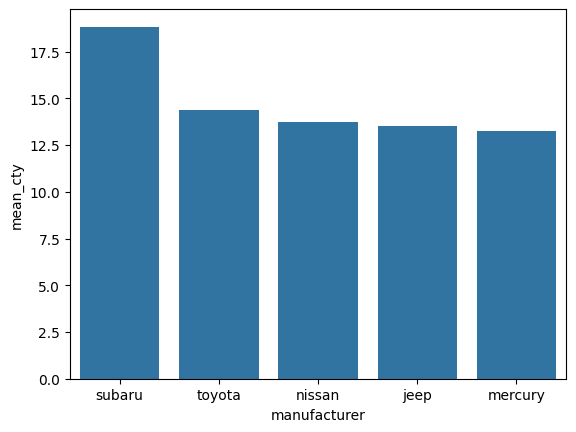

In [33]:
sns.barplot(data = df, x = 'manufacturer', y = 'mean_cty');

## Q2. 자동차 중에 어떤 category(자동차 종류)가 많은지 알아보려고 함. sns.barplot()을 이용해 자동차 종류별 빈도를 표현한 막대 그래프를 만들어 보시오. 막대는 빈도가 높은 순으로 정렬하시오
힌트 : 빈도가 높은 손으로 정렬해 빈도표를 만든 다음 sns.barplot()을 이용해 막대 그래프를 작성

In [34]:
df_mpg = mpg.groupby('category', as_index = False).agg(n = ('category', 'count')).sort_values('n', ascending = False)
df_mpg

,category,n
6,suv,62
1,compact,47
2,midsize,41
5,subcompact,35
4,pickup,33
3,minivan,11
0,2seater,5


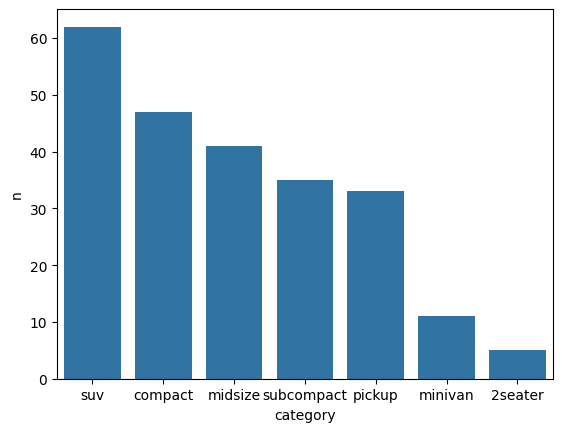

In [35]:
sns.barplot(data = df_mpg, x = 'category', y = 'n');